<h4>1. What is the fundamental idea behind support vector machines?</h4>

The fundamental idea behind SVMs is to fit the widest possible "street" between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. 

<h4>2. What is a support vector?</h4>
After training an SVM, a <em>support vector</em> is any instance located on the "street", including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e. is off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the streeet they won't affect the decision boundary. Computing the predictions with a kernelised SVM only involves the support vectors, not the whole training set.

<h4>3. Why is it important to scale the inputs when using SVMs?</h4>

SVMs try to fit the largest possible street between the classes, so if the training set is not scaled, the SVM will tend to neglect small features.

<h4>4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?</h4>

You can use the decision_function() method to get confidence scores. These scores represent the distance between the instance and the decision boundary. However, they cannot be directly converted into an estimation of the classp probability. If you set probability=True when creating an SVC, then at the end of training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, and it will train a LogisticRegression model to map these scores to estimated probabilities. The predict_proba() and predict_log_proba() methods will then be available.

<h4>5. How can you choose between LinearSVC, SVC, and SGDClassifier?</h4>

All three classes are used for large-margin linear classification. 
<ul>
    <li>The SVC class also supports the kernel trick, which makes it capable of handling nonlinear tasks. The SVC class does not, however, scale well to datasets with many instances. It does, however, scale well to a large number of features.</li>
    <li>The LinearSVC class implements an optimised algorithm for linear SVMs.</li>
    <li>SGDClassifier uses Stochastic Gradient Descent. </li>
    <li>Depending on the dataset, LinearSVC may be a bit faster than SGDClassifier, but not always, and SGDClassifier is more flexible, plus it supports incremental learning.</li>
</ul>

<h4>6. Say you're training an SVM classifier with an RBF kernel, but it seems to underfit the training data. Should you increase gamma? What about C?</h4>

If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularisation. To decrease it, you need to increase gamma or C or both.

<h4>7. What does it mean for a model to be epsilon-insensitive?</h4>

A Regression SVM model tries to fit as many instances within a small margin around its predictions. If you add instances within the margin, the model will not be affected at all: it is said to be $\epsilon$-insensitive.

<h4>8. What is the point of using the kernel trick?</h4>

THe kernel trick is a mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result without having to transform the inputs at all.

<h4>9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can produce roughly the same model. </h4>

In [33]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C = 5
alpha = 1 / (C * len(X))

In [35]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(loss = "hinge", C = C, random_state = 42)

lin_clf.fit(X_scaled, y)

LinearSVC(C=5, loss='hinge', random_state=42)

In [36]:
from sklearn.svm import SVC

svm_clf = SVC(kernel = "linear", C = C)

svm_clf.fit(X_scaled, y)

SVC(C=5, kernel='linear')

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = "hinge", learning_rate = "constant", eta0 = 0.001,
                    alpha =alpha, max_iter = 1000, tol = 1e-3, random_state = 42)

sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.002, eta0=0.001, learning_rate='constant',
              random_state=42)

In [38]:
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)


LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


The decison boundaries are then given by:

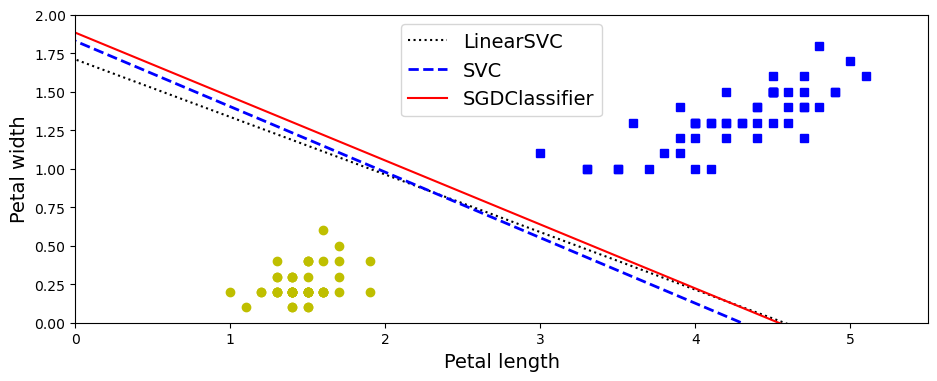

In [39]:
import matplotlib.pyplot as plt

# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()


<h4>10. Train an SVM classifier on the wine dataset. What accuracy can you reach?</h4>

In [40]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame = True)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( wine.data, wine.target, random_state = 42)

In [42]:
lin_clf = LinearSVC(dual = True, random_state = 42)
lin_clf.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

This failed to converge. Let's try to increase the number of training iterations.

In [43]:
lin_clf = LinearSVC(max_iter = 1_000_000, dual = True, random_state = 42)
lin_clf.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=1000000, random_state=42)

In [44]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.90997150997151

We get 91% accuracy, but this isn't great. The cause: We never scaled the features.

In [45]:
from sklearn.pipeline import make_pipeline

lin_clf = make_pipeline(StandardScaler(), LinearSVC(dual = True, random_state = 42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [46]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

What about a kernelised SVM?

In [48]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

Let's see if we can do any better. Let's give some hyperparameter tuning a go:

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter = 100, cv = 5, random_state = 42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_score_

0.9925925925925926

In [53]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

<h4>11.Train and fine-tune an SVM regressor on the California housing dataset. What is your best model's RMSE?</h4>

In [54]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [56]:
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42))])

This doesn't converge. Let's increase the max_iter.

In [57]:
lin_svr = make_pipeline(StandardScaler(), LinearSVR(max_iter = 5000, dual = True, random_state = 42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=5000, random_state=42))])

In [58]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [60]:
import numpy as np

np.sqrt(mse)

0.979565447829459

Let's see if we can do better with an RBF Kernel.

We will use randomised search with cross-validation to find the appropriate hyperparameter values for C and gamma:

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib, n_iter = 100, cv = 3, random_state = 42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485974))])

In [62]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train, scoring = "neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [63]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

0.5854732265172222